In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math,copy

In [2]:
# multiple features to determine price of the house
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [3]:
data = pd.DataFrame(X_train,columns = ["sqft","number of bedroom","number of floors","age of home"])

In [4]:
data["price"]= y_train

In [5]:
data

,sqft,number of bedroom,number of floors,age of home,price
0,2104,5,1,45,460
1,1416,3,2,40,232
2,852,2,1,35,178


In [6]:
#creating cost function for f(w,b) = x*w + b, and y.

def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = np.dot(x[i],w) + b
        cost = cost + (y[i] - f_wb)**2
        
    cost = (1/(2*m))*cost
    return cost

In [7]:
#create a function which computes gradient to minimize w and b.
def compute_gradient(x,y,w,b):
    m,n =x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        f_wb= (np.dot(x[i],w) + b)
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (f_wb - y[i]) * x[i,j]
        dj_db_i = f_wb -y[i]
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw,dj_db

In [8]:
#create gradient descent funcion which find w and b to minimize cost(mean squared error)
def gradient_descent(x,y,w_init,b_init,alpha,compute_cost,compute_gradient,num_iters):
    j_history = []
    b = b_init
    w = w_init
    
    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        #save cost j at each iteration
        j_history.append(compute_cost(x,y,w,b))
    
    return w, b, j_history

In [9]:
w = np.zeros(X_train.shape[1])
b = 0.
iters = 10
alpha = 1e-7
w_final,b_final,j_history = gradient_descent(X_train,y_train,w,b,alpha,compute_cost,compute_gradient,iters)

In [10]:
w_final

array([1.88957022e-01, 4.41422869e-04, 1.29814674e-04, 4.63682728e-03])

In [11]:
b_final

0.00011058974720304363

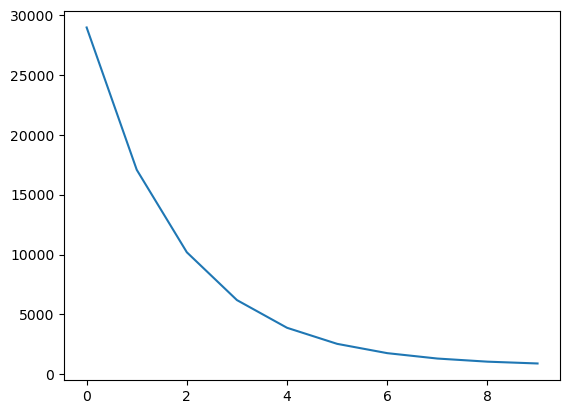

In [12]:
plt.plot(range(10),j_history)

In [13]:
print(f"the final value of w is: {w_final}, and final value of b is: {b_final:0.3f}")

the final value of w is: [1.88957022e-01 4.41422869e-04 1.29814674e-04 4.63682728e-03], and final value of b is: 0.000


In [14]:
y_predict = np.dot(X_train ,w_final) + b_final

In [15]:
for i in range(X_train.shape[0]):
    print(f"predicted value is: {y_predict[i]}, target value is: {y_train[i]}")

predicted value is: 397.7766795353992, target value is: 460
predicted value is: 267.7503110680905, target value is: 232
predicted value is: 161.15479515183347, target value is: 178


Text(0, 0.5, 'price')

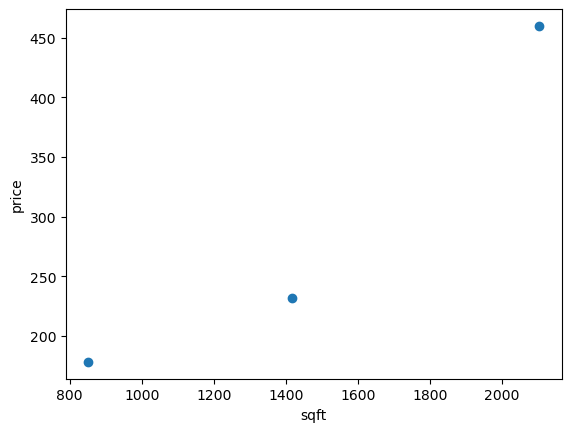

In [16]:
# plot each feature verses price to see which feacturs have the stongest influence
plt.scatter(X_train[:,0],y_train)
plt.xlabel(data.columns[0])
plt.ylabel("price")

Text(0, 0.5, 'price')

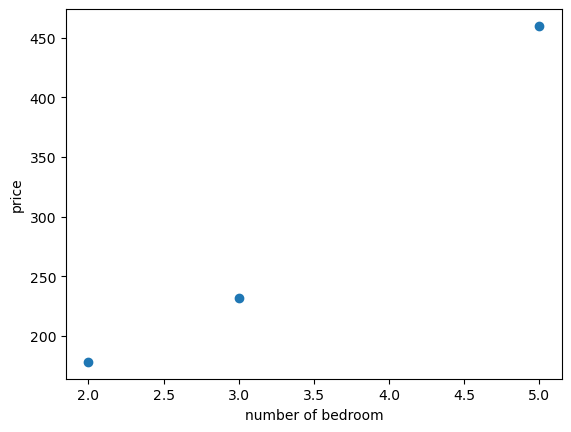

In [17]:
# plot each feature verses price to see which feacturs have the stongest influence
plt.scatter(X_train[:,1],y_train)
plt.xlabel(data.columns[1])
plt.ylabel("price")

Text(0, 0.5, 'price')

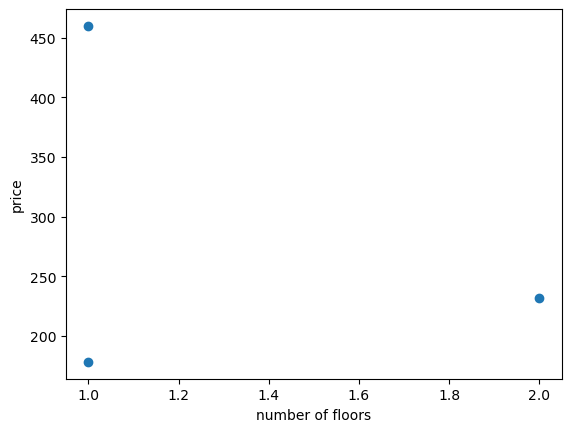

In [18]:
# plot each feature verses price to see which feacturs have the stongest influence
plt.scatter(X_train[:,2],y_train)
plt.xlabel(data.columns[2])
plt.ylabel("price")

Text(0, 0.5, 'price')

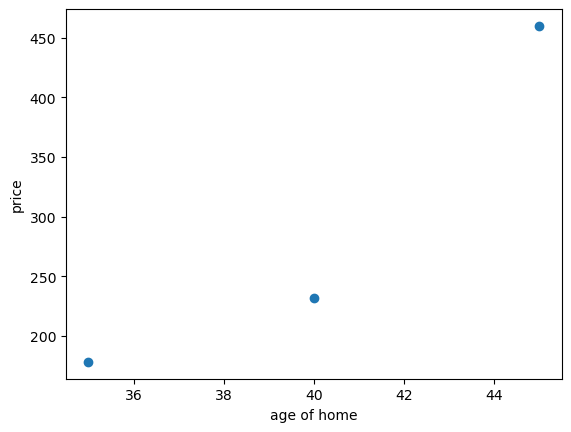

In [19]:
# plot each feature verses price to see which feacturs have the stongest influence
plt.scatter(X_train[:,3],y_train)
plt.xlabel(data.columns[3])
plt.ylabel("price")

In [20]:
#the predictions are not accurate so to improve the acurracy we need scale the sqft feature to have similar range

In [21]:
def zscore_normalize_features(X):
    xhat = np.mean(X,axis = 0)
    sigma = np.std(X,axis =0)
    X_norm = (X - xhat) /sigma
    return X_norm,xhat,sigma

In [22]:
X_normalized,xhat,sigma = zscore_normalize_features(X_train)

In [23]:
xhat

array([1.45733333e+03, 3.33333333e+00, 1.33333333e+00, 4.00000000e+01])

In [24]:
sigma

array([5.11961804e+02, 1.24721913e+00, 4.71404521e-01, 4.08248290e+00])

In [25]:
iters= 1000
alpha = 1.0e-1 # learning rate
w_norm,b_norm,j_history = gradient_descent(X_normalized,y_train,w,b,alpha,compute_cost,compute_gradient,iters)

In [26]:
print(f"w_norm is: {w_norm}")
print(f"b_norm is :{b_norm}")

w_norm is: [ 38.05161505  41.54327451 -30.98894656  36.34177447]
b_norm is :289.9999999999998


In [27]:
m = X_normalized.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_normalized[i],w_norm) + b_norm 

In [28]:
yp

array([460., 232., 178.])

In [29]:
for i in range(X_normalized.shape[0]):
    print(f"predicted value is: {yp[i]}, target value is: {y_train[i]}")

predicted value is: 459.9999999999998, target value is: 460
predicted value is: 231.99999999999977, target value is: 232
predicted value is: 177.99999999999972, target value is: 178


In [30]:
x_house = np.array([1200,3,1,40])
x_house_norm = (x_house-xhat)/sigma
predicted_price = np.dot(x_house_norm,w_norm) + b_norm

In [31]:
print(f"the predicted price for the house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old is :{predicted_price}" )

the predicted price for the house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old is :281.6832599933722
